Model: KNN
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
------------------------------


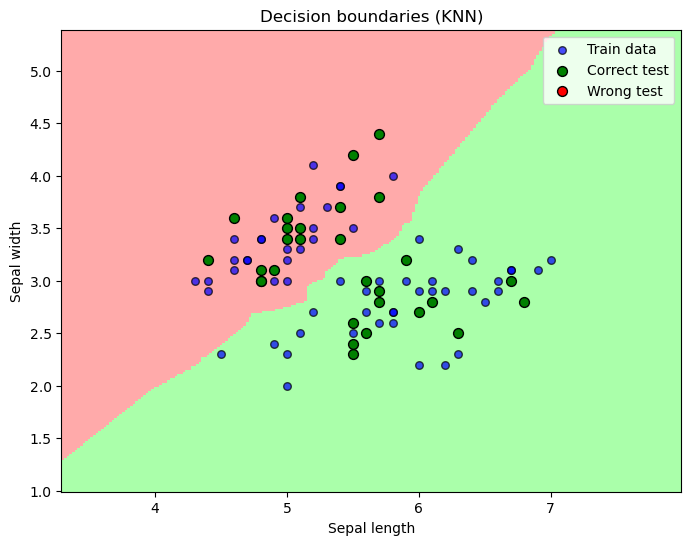

Model: Decision Tree
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
------------------------------


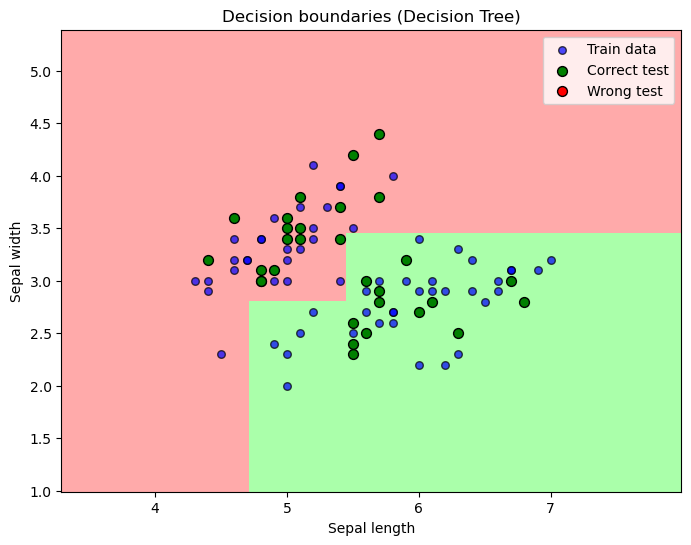

Model: Logistic Regression
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
------------------------------


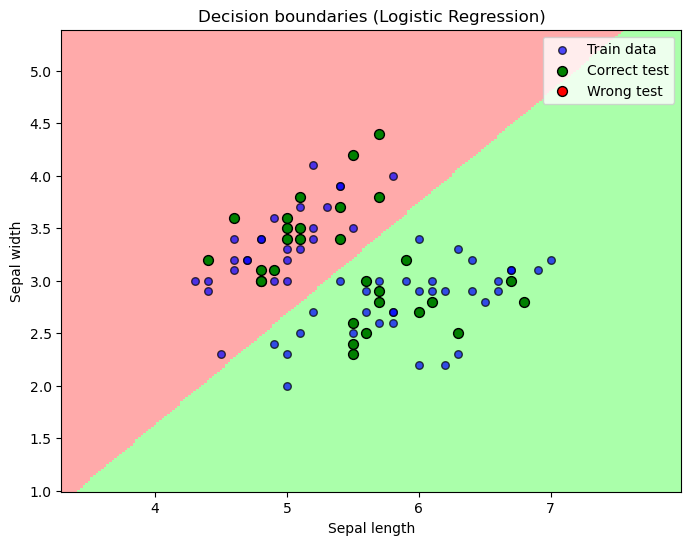

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib.colors import ListedColormap


#Рой Анастасия
# Iris
iris = load_iris()
X = iris.data[:, :2]  # sepal length и sepal width (первые 2 признака)
y = iris.target

# классы 0 (setosa) и 1 (versicolor)
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]


#Манаева Алиса
# Разделение на обучающую и тестовую данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение моделей
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}



#Скоробогатова Мария
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Шаг сетки
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])  # Светлые цвета для областей
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])   # Яркие цвета для точек (красный и зелёный)

    # Создание сетки
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Предсказание для сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Визуализация
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    
    # Обучающие данные — синие точки
    plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', edgecolor='k', s=30, label='Train data', alpha=0.7)
    
    # Тестовые данные: зелёные (верные) и красные (неверные)
    y_pred = model.predict(X_test)
    correct = (y_pred == y_test)
    plt.scatter(X_test[correct, 0], X_test[correct, 1], c='green', edgecolor='k', s=50, label='Correct test')
    plt.scatter(X_test[~correct, 0], X_test[~correct, 1], c='red', edgecolor='k', s=50, label='Wrong test')
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(title)
    plt.legend()
    plt.show()


#Манаева Алиса
# Обучение моделей и вывод метрик + графиков
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("-" * 30)
    
    plot_decision_boundary(model, X, y, f"Decision boundaries ({name})")